In [1]:
import time
import numpy as np
import operator
from functools import partial

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani


plt.rc('animation', html='html5')
sns.set_theme(context='notebook', style='ticks', palette='muted', font_scale=1.25)

# Need ImageMagick

plt.rcParams["animation.html"] = "jshtml"

# Visualize Partition Code

In [2]:
def lomuto_partition_viz(arr, lo, hi):
    pivot = arr[hi]
    yield {'arr': arr, 'lo': lo, 'pivot': hi, 'hi': 0, 'swap': False}
    for j in range(lo, hi):            
        if arr[j] <= pivot:
            arr[lo], arr[j] = arr[j], arr[lo]
            lo += 1 
            yield {'arr': arr, 'lo': lo, 'pivot': hi, 'hi': j, 'swap': True}
            # yield {'arr': arr, 'lo': lo, 'pivot': hi, 'hi': j, 'swap': True}
        else:
            yield {'arr': arr, 'lo': lo, 'pivot': hi, 'hi': j, 'swap': False}

 
    arr[lo], arr[hi] = arr[hi], arr[lo]
    yield {'arr': arr, 'lo': lo, 'pivot': lo, 'hi': j, 'swap': False}
    # return lo, pivot

In [3]:
def hoare_partition_viz(arr, lo, hi):
    pivot_ind, pivot = hi, arr[hi]
    yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False}
    hi -= 1
    yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False}
    while True:
        while arr[lo] <= pivot and lo < hi: 
            lo += 1
            yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False}
        while arr[hi] > pivot and lo < hi:
            hi -= 1
            yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False}
        if lo < hi:
            arr[lo], arr[hi] = arr[hi], arr[lo]
            yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True}
            # yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True}
        else:
            if arr[lo] <= pivot:
                lo += 1
            yield {'arr': arr, 'lo': lo, 'pivot': lo, 'hi': hi, 'swap': False}
            arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
            yield {'arr': arr, 'lo': lo, 'pivot': lo, 'hi': hi, 'swap': False}
            break
            # return lo, pivot

In [4]:
def andrei_partition_viz(arr, lo, hi): # https://youtu.be/fd1_Miy1Clg?t=1696
    pivot_ind, pivot = lo, arr[lo]
    yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False}
    old_arr_hi, arr[hi] = arr[hi], pivot + 1
    yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False, 'bubble': hi}

    while True:
        lo += 1
        while arr[lo] <= pivot: 
            yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False, 'bubble': hi}
            lo += 1
        arr[hi] = arr[lo]
        yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True, 'bubble': lo}
        # yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True, 'bubble': lo}

        hi -= 1
        while pivot < arr[hi]: 
            yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False, 'bubble': lo}
            hi -= 1
        if lo >= hi: break
        arr[lo] = arr[hi]
        yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True, 'bubble': hi}
        # yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True, 'bubble': hi}

    assert lo - hi <= 2 and pivot >= arr[hi]
    if (lo == hi + 2):
        assert arr[hi + 1] >= pivot
        arr[lo] = arr[hi + 1]
        yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True}
        # yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True}
        lo -= 1
        yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': False}

    arr[lo] = old_arr_hi
    if (pivot < old_arr_hi): lo -= 1
    yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True}
    # yield {'arr': arr, 'lo': lo, 'pivot': pivot_ind, 'hi': hi, 'swap': True}

    arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
    yield {'arr': arr, 'lo': lo, 'pivot': lo, 'hi': hi, 'swap': False}
    # return lo, pivot

## Animate Matplotlib

In [5]:
def animate_partition(partition_fn, lower=20, upper=40, size=50):
    fig, ax = plt.subplots(figsize=(12, 4))
    arr = np.random.randint(lower, upper, size=size)
    arr[-1] = (lower + upper)//2
    arr[0] = (lower + upper)//2
    x = np.arange(len(arr))

    def getmepie(vals):
        arr, lo, pivot, hi, swap = vals['arr'], vals['lo'], vals['pivot'], vals['hi'], vals['swap']
        bubble = vals.get('bubble', None)
        ax.clear()
        barlist = ax.bar(x, arr, color='black')
        ax.axis('off')

        for i, is_less in enumerate(arr <= arr[pivot]):
            if is_less:
                barlist[i].set_color('lightgray')  
        
        if lo != pivot:
#             if not swap:
#                 barlist[lo].set_color('g')
#                 barlist[hi].set_color('g')
#             else:
            barlist[lo].set_color('r')
            barlist[hi].set_color('r')

        if bubble:
            barlist[bubble].set_color('pink')
        
        barlist[pivot].set_color('b')

        return barlist

    return ani.FuncAnimation(fig, getmepie, frames=partition_fn(arr, 0, len(arr)-1), interval=400, repeat=False)

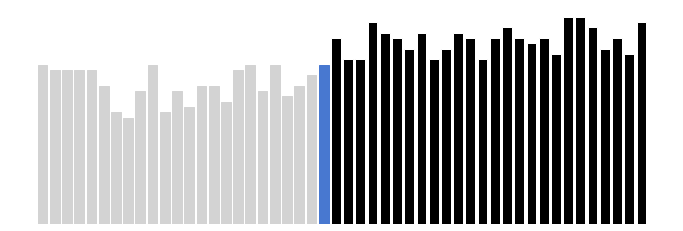

In [6]:
anim = animate_partition(lomuto_partition_viz)
# anim.save('assets/lomuto_animation.gif', writer='imagemagick', fps=3)
anim

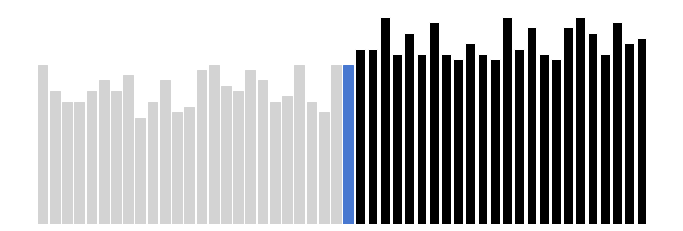

In [7]:
anim = animate_partition(hoare_partition_viz)
# anim.save('assets/hoare_animation.gif', writer='imagemagick', fps=3)
anim

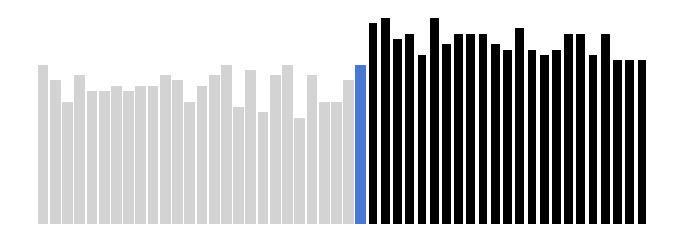

In [8]:
anim = animate_partition(andrei_partition_viz)
# anim.save('assets/andrei_animation.gif', writer='imagemagick', fps=3)
anim

## Tests

In [9]:
def test_partition(partition, num_iter=500, sizes=(10_001, 10_000)):
    times = np.empty((len(sizes), num_iter))
    for i, maxi in enumerate(sizes):
        for n in range(num_iter):
            x = np.random.randint(0, high=maxi*2, size=maxi)
            x_copy = x.copy()
            start = time.perf_counter()
            cut, pivot = partition(x, 0, len(x)-1)
            times[i, n] = time.perf_counter() - start

            assert x[cut] == pivot
            assert (np.sort(x) == np.sort(x_copy)).all(), (np.sort(x) - np.sort(x_copy)).nonzero()
            lhs = x[:cut] <= pivot
            if not lhs.all():
                print(np.nonzero(~lhs))
                print(lhs[np.nonzero(~lhs)[0].squeeze():])
            rhs = x[cut+1:] > pivot
            if not rhs.all():
                print(np.nonzero(~rhs))
                print(rhs[np.nonzero(~rhs)[0].squeeze():])

    return times.mean(-1)

## Count Stuff

In [10]:
def lomuto_partition_counting(arr, lo, hi, predicate, ind_lt):
    pivot = arr[hi]
    j = lo
    while ind_lt(j, hi):
        if predicate(arr[j], pivot):
            arr[lo], arr[j] = arr[j], arr[lo]
            lo += 1
        j += 1
 
    arr[lo], arr[hi] = arr[hi], arr[lo]
    return lo, pivot

In [11]:
def hoare_partition_counting(arr, lo, hi, predicate, ind_lt):
    pivot_ind, pivot = hi, arr[hi]
    hi -= 1
    while True:
        while predicate(arr[lo], pivot) and ind_lt(lo, hi): 
            lo += 1 
        while not predicate(arr[hi], pivot) and ind_lt(lo, hi):
            hi -= 1
        if ind_lt(lo, hi):
            arr[lo], arr[hi] = arr[hi], arr[lo]
        else:
            if predicate(arr[lo], pivot):
                lo += 1
            arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
            return lo, pivot

In [12]:
def andrei_partition_counting(arr, lo, hi, predicate, ind_lt):
    pivot_ind, pivot = lo, arr[lo]
    old_arr_hi, arr[hi] = arr[hi], pivot+1

    while True:
        lo += 1
        while predicate(arr[lo], pivot): lo += 1
        arr[hi] = arr[lo]

        hi -= 1
        while not predicate(arr[hi], pivot): hi -= 1
        if not ind_lt(lo, hi): break
        arr[lo] = arr[hi]

    if lo == hi + 2:
        ind_lt(lo, hi)  # increment counter for this comp
        arr[lo] = arr[hi + 1]
        lo -= 1

    arr[lo] = old_arr_hi
    if (pivot < old_arr_hi): lo -= 1

    arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
    return lo, pivot

In [13]:
def get_testable_fn(partition_fn):
    return partial(partition_fn, predicate=operator.le, ind_lt=operator.lt)

test_partition(get_testable_fn(lomuto_partition_counting), num_iter=500, sizes=[3, 4, 20, 21, 10_000, 10_001])
test_partition(get_testable_fn(hoare_partition_counting), num_iter=500, sizes=[3, 4, 20, 21, 10_000, 10_001])
test_partition(get_testable_fn(andrei_partition_counting), num_iter=500, sizes=[3, 4, 20, 21, 10_000, 10_001])
None

In [14]:
class AssignCountedList(list):
    def __init__(self, iterable):
        super().__init__(iterable)
        self.assign_cnt = 0

    def __setitem__(self, index, value):
        super().__setitem__(index, value)
        self.assign_cnt += 1

class CountedOp:
    def __init__(self, op):
        self.op = op
        self.cnt = 0 

    def __call__(self, a, b):
        self.cnt += 1
        return self.op(a, b)

In [15]:
def ci(vals):  # computes 95% confidence interval for mean of timings
    interval = 1.96 * np.std(vals) / np.sqrt(len(vals))
    return np.mean(vals), interval / 2.

def assigns_and_cmps(partition_fn, size=50):
    arr = AssignCountedList(np.random.randint(0, size*2, size=size))
    predicate, ind_lt = CountedOp(operator.le), CountedOp(operator.lt)
    partition_fn(arr, 0, len(arr)-1, predicate=predicate, ind_lt=ind_lt)
    return arr.assign_cnt, predicate.cnt, ind_lt.cnt

In [16]:
def cmp_and_assign_ci(partition_fn, n_runs=100, size=50):
    lsts = [assigns_and_cmps(partition_fn, size=size) for _ in range(n_runs)]
    return [ci(cnt_list) for cnt_list in zip(*lsts)]  # list assign, list item cmp, index cmp

In [17]:
cmp_and_assign_ci(lomuto_partition_counting)

[(57.48, 2.728362241052313), (49.0, 0.0), (50.0, 0.0)]

In [18]:
cmp_and_assign_ci(hoare_partition_counting)

[(18.72, 0.8098002756235638),
 (67.72, 0.8098002756235638),
 (58.36, 0.4049001378117819)]

In [19]:
cmp_and_assign_ci(andrei_partition_counting)

[(20.55, 0.7545840907413832),
 (50.45, 0.04875438441822438),
 (9.0, 0.38081544086341873)]

## Visualize

In [20]:
name_to_fn = {
     'Lomuto': lomuto_partition_counting,
     'Hoare': hoare_partition_counting,
     'Andrei': andrei_partition_counting,
}

def get_cmp_and_assign_dict(partition_fn_name, n_runs=100, size=50):
    lsts = [assigns_and_cmps(name_to_fn[partition_fn_name], size=size) for _ in range(n_runs)]
    assign, item_cmp, ind_cmp = zip(*lsts)
    return {'Partition Fn': n_runs*[partition_fn_name], 
            'Array Size': n_runs*[size], 
            'Num. Assigns': assign, 'Element Comparisons': item_cmp, 
            'Index Comparisons': ind_cmp}

data = {'Partition Fn': [], 'Array Size': [], 
            'Num. Assigns': [], 'Element Comparisons': [], 
            'Index Comparisons': []}
n_runs = 100

for size in [2**i for i in range(2, 12)]:
    for p_name in name_to_fn:
        for k, v in get_cmp_and_assign_dict(p_name, n_runs=n_runs, size=size).items():
            assert len(v) == n_runs
            data[k].extend(v)

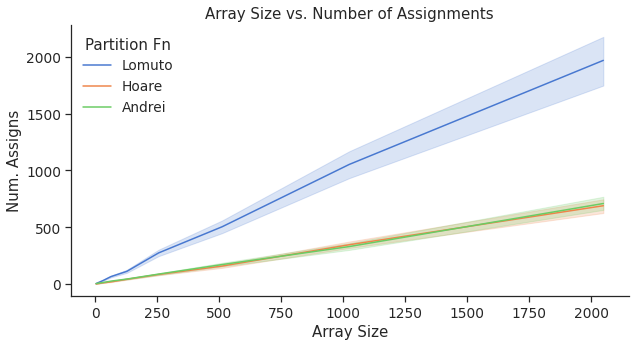

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=data, x='Array Size', y='Num. Assigns', hue='Partition Fn', ax=ax)
ax.set_title('Array Size vs. Number of Assignments')
sns.despine()
ax.legend(frameon=False, title='Partition Fn')
# plt.savefig('assets/num_assigns.png')

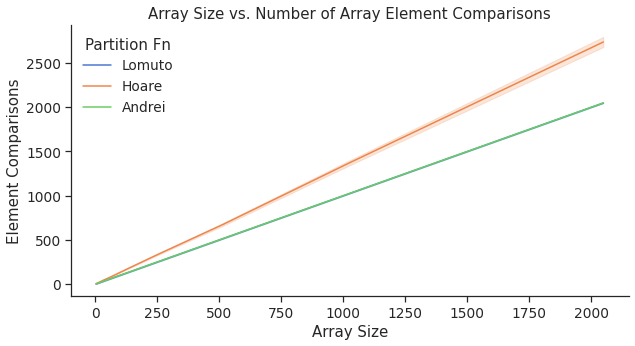

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=data, x='Array Size', y='Element Comparisons', hue='Partition Fn', ax=ax)
ax.set_title('Array Size vs. Number of Array Element Comparisons')
sns.despine()
ax.legend(frameon=False, title='Partition Fn')
# plt.savefig('assets/num_elem_cmp.png')

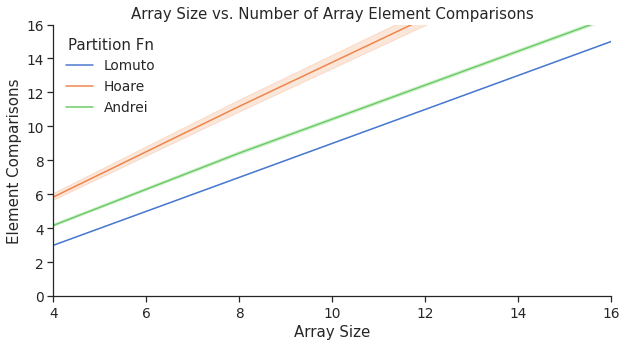

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=data, x='Array Size', y='Element Comparisons', hue='Partition Fn', ax=ax)
ax.set_title('Array Size vs. Number of Array Element Comparisons')
ax.set_ylim(0, 16)
ax.set_xlim(4, 16)
sns.despine()
ax.legend(frameon=False, title='Partition Fn')
# plt.savefig('assets/num_elem_cmp_zoomed.png')

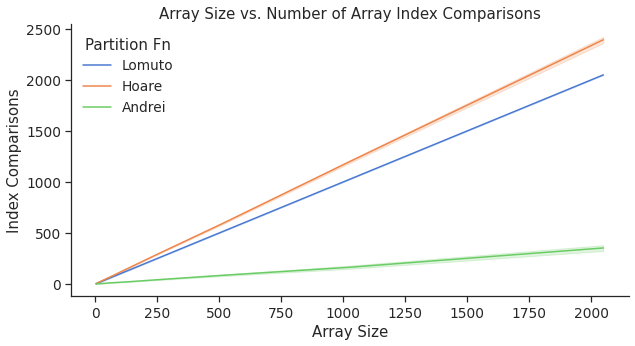

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=data, x='Array Size', y='Index Comparisons', hue='Partition Fn', ax=ax)
ax.set_title('Array Size vs. Number of Array Index Comparisons')
sns.despine()
ax.legend(frameon=False, title='Partition Fn')
# plt.savefig('assets/num_ind_cmp.png')

## TIme

In [25]:
def lomuto_partition(arr, lo, hi):
    pivot = arr[hi]
    for j in range(lo, hi):
        if arr[j] <= pivot:
            arr[lo], arr[j] = arr[j], arr[lo]
            lo += 1
 
    arr[lo], arr[hi] = arr[hi], arr[lo]
    return lo #, pivot

In [26]:
def hoare_partition(arr, lo, hi):
    pivot_ind, pivot = hi, arr[hi]
    hi -= 1
    while True:
        while arr[lo] <= pivot and lo < hi: 
            lo += 1 
        while arr[hi] > pivot and lo < hi:
            hi -= 1
        if lo < hi:
            arr[lo], arr[hi] = arr[hi], arr[lo]
        else:
            if arr[lo] <= pivot:
                lo += 1
            arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
            return lo #, pivot

In [27]:
def andrei_partition(arr, lo, hi):
    pivot_ind, pivot = lo, arr[lo]

    # sentinel at the end, r[hi] now "vacant"
    # we use pivot+1 to ensure the last element acts like a sentinel
    # for our while arr[lo] <= pivot: lo += 1 loop
    old_arr_hi, arr[hi] = arr[hi], pivot+1

    # import pdb; pdb.set_trace()
    while True:
        # half swap from left side
        lo += 1
        while arr[lo] <= pivot: lo += 1
        arr[hi] = arr[lo]

        # half swap from right side
        hi -= 1
        # while arr[hi] > pivot: hi -= 1
        while not arr[hi] <= pivot: hi -= 1
        if lo >= hi: break # early out
        arr[lo] = arr[hi]

    # assert lo - hi <= 2 and pivot >= arr[hi]
    if (lo == hi + 2):
        # fix up half swap that occurs when:
        # arr[lo] > pivot, hi -= 1, pivot >= arr[hi]

        # assert arr[hi + 1] >= pivot
        arr[lo] = arr[hi + 1]
        lo -= 1

    # replace removed value
    arr[lo] = old_arr_hi
    if (pivot < old_arr_hi): lo -= 1

    # assert pivot >= arr[lo]
    # put pivot into right location
    arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
    return lo #, pivot

In [28]:
def time_partition(partition_fn, size, n_runs=500):
    times = []
    for n in range(n_runs):
        x = np.random.randint(0, high=size*2, size=size).astype(np.int32)
        start = time.perf_counter()
        partition_fn(x, 0, len(x)-1)
        times.append(time.perf_counter() - start)
    return times

def get_times_dict(partition_fn, fn_name, n_runs=100, size=50):
    lsts = [assigns_and_cmps(partition_fn, size=size) for _ in range(n_runs)]
    assign, item_cmp, ind_cmp = zip(*lsts)
    return {'Partition Fn': n_runs*[fn_name], 
            'Array Size': n_runs*[size], 
            'Num. Assigns': assign, 'Element Comparisons': item_cmp, 
            'Index Comparisons': ind_cmp}

In [29]:
name_to_fn = {
     'Lomuto': lomuto_partition,
     'Hoare': hoare_partition,
     'Andrei': andrei_partition,
}

time_data = {'Partition Fn': [], 'Array Size': [], 
            'Time (s)': [],}
n_runs = 1000
for size in [2**i for i in range(2, 16)]:
    for p_name in name_to_fn:
        time_data['Partition Fn'].extend(n_runs*[p_name])
        time_data['Array Size'].extend(n_runs*[size])
        time_data['Time (s)'].extend(time_partition(name_to_fn[p_name], size=size, n_runs=n_runs))

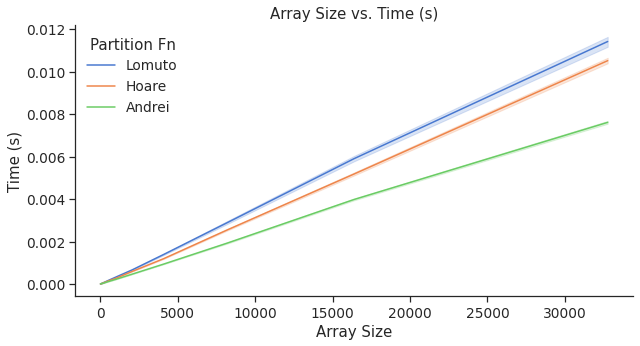

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=time_data, x='Array Size', y='Time (s)', hue='Partition Fn', ax=ax)
ax.set_title('Array Size vs. Time (s)')
sns.despine()
ax.legend(frameon=False, title='Partition Fn')
# plt.savefig('assets/timings.png')

## Cython

In [31]:
%load_ext Cython

In [32]:
%%cython -a
cimport cython
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def lomuto_partition_cython(np.ndarray[int, ndim=1] arr, int lo, int hi):
    cdef int pivot, j
    
    pivot = arr[hi]
    for j in range(lo, hi):
        if arr[j] <= pivot:
            arr[lo], arr[j] = arr[j], arr[lo]
            lo += 1
 
    arr[lo], arr[hi] = arr[hi], arr[lo]
    return lo # , pivot

In [33]:
%%cython -a
cimport cython
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def hoare_partition_cython(np.ndarray[int, ndim=1] arr, int lo, int hi):
    cdef int pivot, pivot_ind
    
    pivot_ind, pivot = hi, arr[hi]
    hi -= 1
    while True:
        while arr[lo] <= pivot & lo < hi: 
            lo += 1 
        while arr[hi] > pivot & lo < hi:
            hi -= 1
        if lo < hi:
            arr[lo], arr[hi] = arr[hi], arr[lo]
        else:
            if arr[lo] <= pivot:
                lo += 1
            arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
            return lo # , pivot

In [34]:
%%cython -a
cimport cython
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def andrei_partition_cython(np.ndarray[int, ndim=1] arr, int lo, int hi):
    cdef int pivot_ind, pivot, old_arr_hi
    
    pivot_ind, pivot = lo, arr[lo]
    old_arr_hi, arr[hi] = arr[hi], pivot+1
    while True:
        lo += 1
        while arr[lo] <= pivot: lo += 1
        arr[hi] = arr[lo]

        hi -= 1
        while arr[hi] > pivot: hi -= 1
        if lo >= hi: break
        arr[lo] = arr[hi]

    if (lo == hi + 2):
        arr[lo] = arr[hi + 1]
        lo -= 1

    # replace removed value
    arr[lo] = old_arr_hi
    if (pivot < old_arr_hi): lo -= 1
    arr[pivot_ind], arr[lo] = arr[lo], arr[pivot_ind]
    return lo # , pivot

In [44]:
def time_np_partition(partition_fn, size, n_runs=500):
    times = []
    for n in range(n_runs):
        x = np.random.randint(0, high=size*2, size=size).astype(np.int32)
        start = time.perf_counter()
        x.partition(0)
        times.append(time.perf_counter() - start)
    return times

In [51]:
name_to_fn = {
     'Lomuto Cython': lomuto_partition_cython,
     'Hoare Cython': hoare_partition_cython,
     'Andrei Cython': andrei_partition_cython,
}

cython_time_data = {'Partition Fn': [], 'Array Size': [], 
                    'Time (s)': [],}
n_runs = 10000
for size in [2**i for i in range(2, 16)]:
    for p_name in name_to_fn:
        cython_time_data['Partition Fn'].extend(n_runs*[p_name])
        cython_time_data['Array Size'].extend(n_runs*[size])
        cython_time_data['Time (s)'].extend(time_partition(name_to_fn[p_name], size=size, n_runs=n_runs))
        
    cython_time_data['Partition Fn'].extend(n_runs*['NumPy'])
    cython_time_data['Array Size'].extend(n_runs*[size])
    cython_time_data['Time (s)'].extend(time_np_partition(name_to_fn[p_name], size=size, n_runs=n_runs))

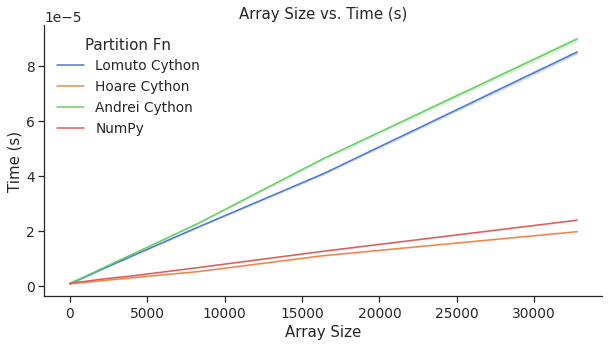

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=cython_time_data, x='Array Size', y='Time (s)', hue='Partition Fn', ax=ax)
ax.set_title('Array Size vs. Time (s)')
sns.despine()
ax.legend(frameon=False, title='Partition Fn')
plt.savefig('assets/cython_timings.png')